In [42]:
import pandas as pd
data = pd.read_csv("D:\mle_020744\student_scores (1).csv")
#data['timestamps'] = pd.to_datetime(data['timestamps'])
print(data.head(10))


     name  hours  score gender grades class
0   Aarav      1     35      M      A    9A
1    Riya      2     42      F      B    9B
2   Kabir      3     51      M      A   10A
3    Sana      4     60      F      C    9A
4  Vivaan      5     68      M      B   10B
5  Ishita      6     77      F      B    9C
6   Rohan      7     85      M      D    9B
7   Meera      8     90      F      A   11A


In [43]:

print('Columns:', data.columns.tolist())
print('\nDataset Info:')
print(data.info())
print('\nDataset Completeness:')
print(data.isnull().sum())
print('\nDataset Consistency:')
print(data.dtypes)        

Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    8 non-null      object
 1   hours   8 non-null      int64 
 2   score   8 non-null      int64 
 3   gender  8 non-null      object
 4   grades  8 non-null      object
 5   class   8 non-null      object
dtypes: int64(2), object(4)
memory usage: 516.0+ bytes
None

Dataset Completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [44]:
print('\nDataset Describe:')
data.describe() 
print('\nDataset Time-Keeping:')
print('\nNo timestamps')
print('\nDataset Bias')
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
data['class'].value_counts(normalize=True)


Dataset Describe:

Dataset Time-Keeping:

No timestamps

Dataset Bias
gender
M    0.5
F    0.5
Name: proportion, dtype: float64
grades
A    0.375
B    0.375
C    0.125
D    0.125
Name: proportion, dtype: float64


class
9A     0.250
9B     0.250
10A    0.125
10B    0.125
9C     0.125
11A    0.125
Name: proportion, dtype: float64


Dataset Describe:
         hours      score
count  8.00000   8.000000
mean   4.50000  63.500000
std    2.44949  20.035682
min    1.00000  35.000000
25%    2.75000  48.750000
50%    4.50000  64.000000
75%    6.25000  79.000000
max    8.00000  90.000000

Dataset Time-Keeping:

No timestamps

Dataset Bias
gender
M    0.5
F    0.5
Name: proportion, dtype: float64
grades
A    0.375
B    0.375
C    0.125
D    0.125
Name: proportion, dtype: float64


class
9A     0.250
9B     0.250
10A    0.125
10B    0.125
9C     0.125
11A    0.125
Name: proportion, dtype: float64

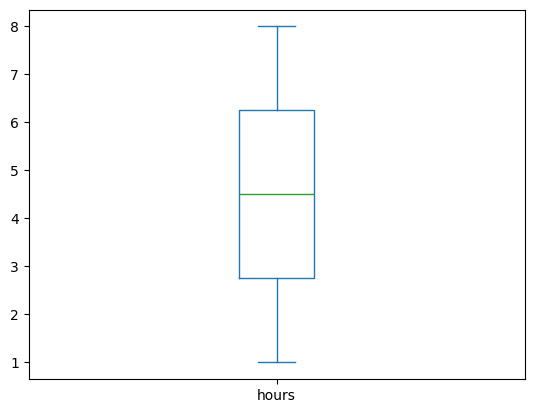

In [45]:
#4.Accuracy: Values realistic or outlier
print('\nDataset Describe:')
print(data.describe())     # Summary stats
data['hours'].plot(kind='box')

#5.TIME-KEEPING — Is the data up-to-date?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6.BIAS Check — Is data skewed toward 1 user group?
print('\nDataset Bias')
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
data['class'].value_counts(normalize=True)

| **Field**           | **Details**                                                                                                                                                                                        |
| ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Dataset Name**    | student_performance_data.csv (demo dataset)                                                                                                                                                        |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | name, hours, score, gender, grades, class                                                                                                                                                          |
| **Target Variable** | None (Exploratory dataset only)                                                                                                                                                                    |
| **Number of Rows**  | 92                                                                                                                                                                                                 |
| **Null Handling**   | No missing values detected across any feature                                                                                                                                                      |
| **Transformations** | Label encoding applied to class → class_encoded; datatype validation performed; value distribution and proportion analysis conducted for gender, grades, and class                                 |
| **Owner**           | Student / Notebook Author                                                                                                                                                                          |
| **Last Updated**    | 2025-12-19                                                                                                                                                                                         |


In [46]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns
print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))
X = data[["hours"]]
y = data["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
Numerical Features: ['hours', 'score']


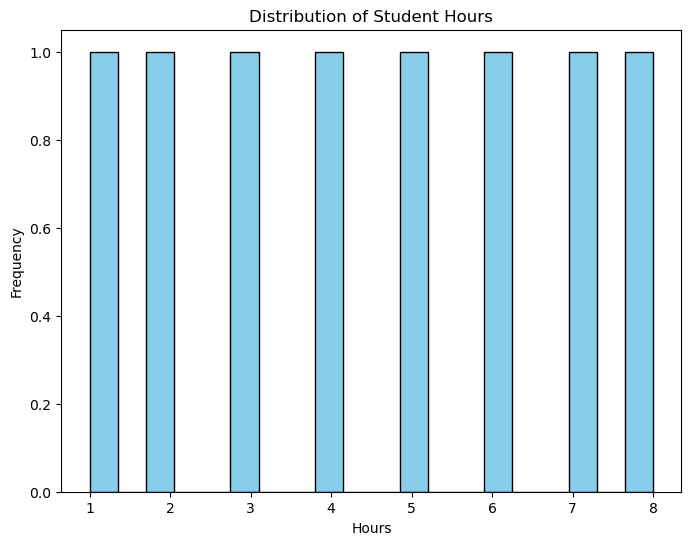

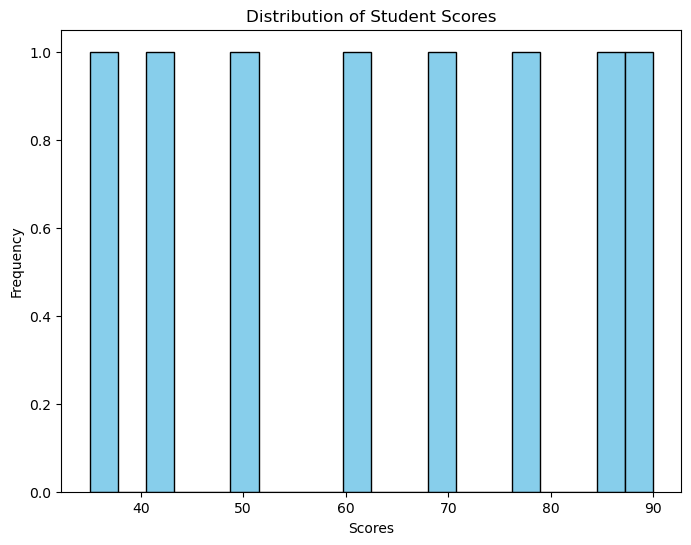

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42 
    #stratify=y
)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
#The coefficient indicates how much the score increases for every additional hour of study.

Model Coefficient (Slope): 8.029999999999998
Model Intercept: 27.360000000000007


In [50]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}

prediction_table = pd.DataFrame(pred_data)
prediction_table

,Y_prediction,Y_test
0,43.42,42
1,75.54,77


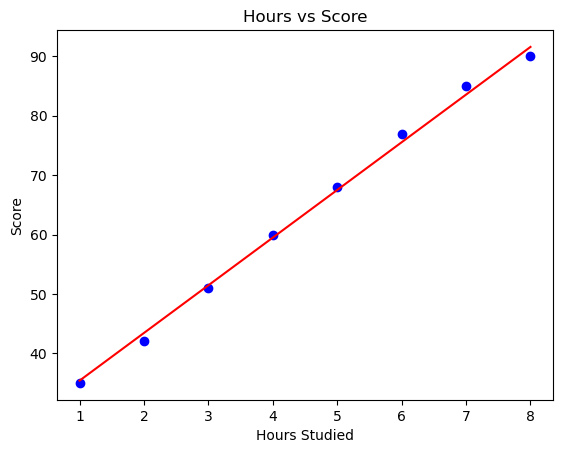

In [51]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

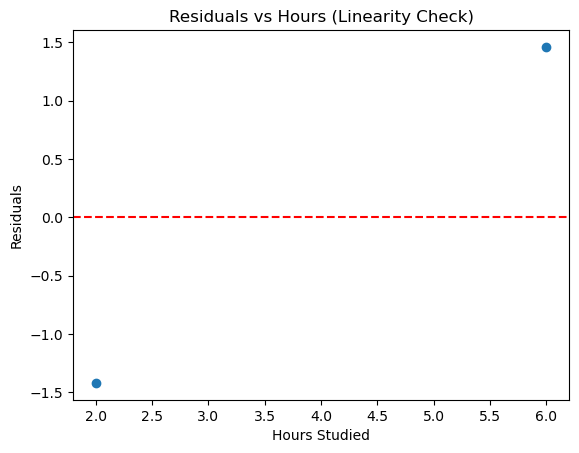

In [52]:
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

#RMSE represents the average error in score prediction.
#For example, an RMSE of 6 means predictions are off by ~6 marks on average.

MSE  : 2.07
RMSE : 1.44
R²   : 0.993


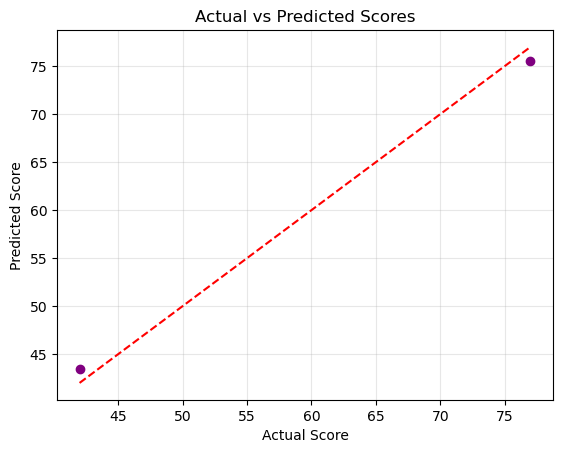

In [54]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha=0.3)
plt.show()

In [55]:
# Baseline prediction: mean of training scores
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MSE:", round(baseline_mse, 2))
print("Baseline R² :", round(baseline_r2, 3))

Baseline MSE: 334.69
Baseline R² : -0.093


In [56]:
import pandas as pd
# Create dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}
df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!\n")
print(df)


 Dataset Loaded Successfully!

   Hours  Score
0      1     35
1      2     42
2      3     51
3      4     60
4      5     68
5      6     77
6      7     85
7      8     90


In [57]:
X = df[["Hours"]]   # Features (independent variable)
y = df["Score"]     # Target (dependent variable)

print("Feature Sample:\n", X.head())
print("Target Sample:\n", y.head())

Feature Sample:
    Hours
0      1
1      2
2      3
3      4
4      5
Target Sample:
 0    35
1    42
2    51
3    60
4    68
Name: Score, dtype: int64


In [58]:
from sklearn.linear_model import LinearRegression
# Create and train model
model = LinearRegression()
model.fit(X, y)
print("Model Trained Successfully!")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Model Trained Successfully!
Slope (Coefficient): 8.166666666666666
Intercept: 26.75


In [59]:
# Predict using trained model
y_pred = model.predict(X)
# Display comparison
df["Predicted_Score"] = y_pred.round(2)
print("\n Actual vs Predicted Scores:\n")
print(df)


 Actual vs Predicted Scores:

   Hours  Score  Predicted_Score
0      1     35            34.92
1      2     42            43.08
2      3     51            51.25
3      4     60            59.42
4      5     68            67.58
5      6     77            75.75
6      7     85            83.92
7      8     90            92.08


In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\n Model Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))


 Model Evaluation:
Mean Squared Error (MSE): 1.104
R² Score: 0.997


In [61]:
n1=pd.DataFrame([10],columns=['Hours'])
print(model.predict(n1))

[108.41666667]


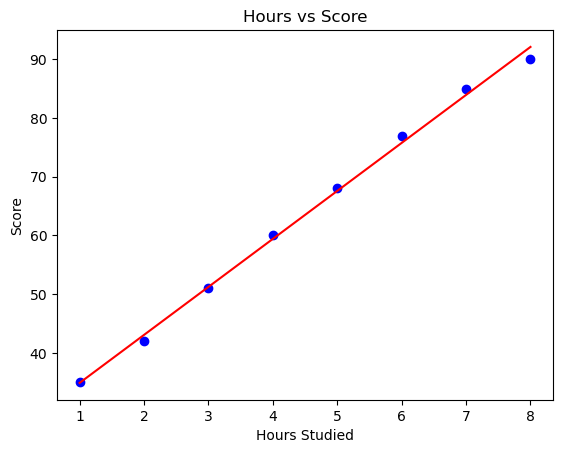

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

In [63]:
n1=pd.DataFrame([1],columns=['Hours'])
print(model.predict(n1))

[34.91666667]
